In [1]:
using DrWatson
@quickactivate projectdir()

using XLSX
using DataFrames
using JSON
using CSV
import Tables: rowtable, columntable

using CSV, DataFrames, Muon
using StatsPlots, StatsBase
theme(:default, grid=false, tickdir=:out, label="")
getlims(x) = x |> extrema |> x->abs.(x) |> maximum |> x-> (-x, x)

getlims (generic function with 1 method)

In [2]:
ddir = datadir("exp_raw", "BBConsortia")
pdir = plotsdir("BBConsortia") |> mkpath

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia"

In [165]:
df = XLSX.readtable(joinpath(ddir, "consortia_metab_quant_data.xlsx"), "query_output2", infer_eltypes=true) |> 
    DataFrame;

In [157]:
fdf = filter(:hmmf_panels_used => x->contains(x, "PFBBr"), df);

In [167]:
size(fdf)

(48, 10)

In [6]:
tfdf = fdf |> df->groupby(df, names(fdf)[1:9]) |>
    df->combine(df, :compounds_values_blanks => ByRow((
        x->columntable(JSON.parse.(x))
    )) => AsTable)  |>
    df->flatten(df, [:compound, :value, :blank]) |>
    df->rename(df, :msk_id => :con_id) |>
    df->transform(df, [:value, :blank] => ByRow((x,y)->log2(max(x, 0.005)/max(y, 0.005))) => :log2FC)

1090×13 DataFrame
  Row │ con_id   experiment_id  input_condition                    hmmf_panels ⋯
      │ String   Int64          String                             String      ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    2 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    3 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    4 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    5 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    6 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    7 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    8 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
  ⋮   │    ⋮           ⋮                        ⋮                              ⋱
 1084 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1085 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1086 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1087 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1088 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1089 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1090 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
                                                10 columns and 1075 rows omitted

In [7]:
conjs = JSON.parse(open(readline, joinpath(ddir, "consortia_isolate.json")))
condf = vcat(DataFrame.(conjs)...) |>
    df->select(df, :con_id, :consortia => AsTable) |>
    df->string.(df) |>
    df->sort(df, [:con_id, :msk_id])

51×4 DataFrame
 Row │ con_id   msk_id     name                        seq_id           
     │ String   String     String                      String           
─────┼──────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   2 │ CON.084  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
   3 │ CON.084  DFI.3.84   Coprococcus comes           210702-DFI.3.84
   4 │ CON.085  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   5 │ CON.085  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
   6 │ CON.085  DFI.6.78   Anaerobutyricum soehngenii  211108-DFI.6.78
   7 │ CON.086  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   8 │ CON.086  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  ⋮  │    ⋮         ⋮                  ⋮                      ⋮
  45 │ CON.122  SL.2.19    Flavonifractor plautii      220104-SL.2.19
  46 │ CON.123  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
  47 │ CON.123  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  48 │ CON.123  DFI.5.16   Coprococcus eutactus        210702-DFI.5.16
  49 │ CON.124  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
  50 │ CON.124  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  51 │ CON.124  DFI.7.37   nothing                     nothing
                                                         36 rows omitted

In [8]:
CSV.write(joinpath(ddir, "consortia_isolate.csv"), condf)

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BBConsortia/consortia_isolate.csv"

In [9]:
condf

51×4 DataFrame
 Row │ con_id   msk_id     name                        seq_id           
     │ String   String     String                      String           
─────┼──────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   2 │ CON.084  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
   3 │ CON.084  DFI.3.84   Coprococcus comes           210702-DFI.3.84
   4 │ CON.085  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   5 │ CON.085  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
   6 │ CON.085  DFI.6.78   Anaerobutyricum soehngenii  211108-DFI.6.78
   7 │ CON.086  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
   8 │ CON.086  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  ⋮  │    ⋮         ⋮                  ⋮                      ⋮
  45 │ CON.122  SL.2.19    Flavonifractor plautii      220104-SL.2.19
  46 │ CON.123  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
  47 │ CON.123  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  48 │ CON.123  DFI.5.16   Coprococcus eutactus        210702-DFI.5.16
  49 │ CON.124  DFI.1.234  [Clostridium] scindens      211117-DFI.1.234
  50 │ CON.124  DFI.2.45   Bifidobacterium longum      210702-DFI.2.45
  51 │ CON.124  DFI.7.37   nothing                     nothing
                                                         36 rows omitted

In [10]:
added_isolate = filter(:msk_id => !in(["DFI.1.234", "DFI.2.45"]), condf)

17×4 DataFrame
 Row │ con_id   msk_id     name                          seq_id          
     │ String   String     String                        String          
─────┼───────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.3.84   Coprococcus comes             210702-DFI.3.84
   2 │ CON.085  DFI.6.78   Anaerobutyricum soehngenii    211108-DFI.6.78
   3 │ CON.086  DFI.4.30   Anaerostipes hadrus           210702-DFI.4.30
   4 │ CON.087  DFI.1.19   Anaerostipes caccae           210509-DFI.1.19
   5 │ CON.088  DFI.5.28   [Eubacterium] rectale         210928-DFI.5.28
   6 │ CON.089  MSK.6.3    Roseburia faecis              TM222
   7 │ CON.090  DFI.5.40   Faecalibacterium prausnitzii  210226-DFI.5.40
   8 │ CON.091  MSK.11.20  Anaerostipes hadrus           TM456
   9 │ CON.092  DFI.5.64   [Clostridium] symbiosum       210702-DFI.5.64
  10 │ CON.093  MSK.14.17  Anaerostipes hadrus           TM376
  11 │ CON.094  DFI.5.75   nothing                       nothing
  12 │ CON.095  MSK.16.22  [Eubacterium] rectale         MSK16_22
  13 │ CON.096  MSK.17.84  Roseburia intestinalis        MSK17_84
  14 │ CON.121  DFI.5.67   [Clostridium] innocuum        210702-DFI.5.67
  15 │ CON.122  SL.2.19    Flavonifractor plautii        220104-SL.2.19
  16 │ CON.123  DFI.5.16   Coprococcus eutactus          210702-DFI.5.16
  17 │ CON.124  DFI.7.37   nothing                       nothing

In [11]:
consortias = condf |> df->sort(df, [:con_id,:msk_id]) |>
    df->groupby(df, :con_id) |>
    df->combine(df, :msk_id => (x->join(x, ",")) => :con_list)

17×2 DataFrame
 Row │ con_id   con_list                     
     │ String   String                       
─────┼───────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84
   2 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78
   3 │ CON.086  DFI.1.234,DFI.2.45,DFI.4.30
   4 │ CON.087  DFI.1.19,DFI.1.234,DFI.2.45
   5 │ CON.088  DFI.1.234,DFI.2.45,DFI.5.28
   6 │ CON.089  DFI.1.234,DFI.2.45,MSK.6.3
   7 │ CON.090  DFI.1.234,DFI.2.45,DFI.5.40
   8 │ CON.091  DFI.1.234,DFI.2.45,MSK.11.20
   9 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64
  10 │ CON.093  DFI.1.234,DFI.2.45,MSK.14.17
  11 │ CON.094  DFI.1.234,DFI.2.45,DFI.5.75
  12 │ CON.095  DFI.1.234,DFI.2.45,MSK.16.22
  13 │ CON.096  DFI.1.234,DFI.2.45,MSK.17.84
  14 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67
  15 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19
  16 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16
  17 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37

In [12]:
mrgdf = leftjoin(tfdf, consortias, on=:con_id) 
mrgdf = leftjoin(mrgdf, added_isolate, on=:con_id)

1090×17 DataFrame
  Row │ con_id   experiment_id  input_condition                    hmmf_panels ⋯
      │ String   Int64          String                             String      ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    2 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    3 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    4 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    5 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    6 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    7 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    8 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
  ⋮   │    ⋮           ⋮                        ⋮                              ⋱
 1084 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1085 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1086 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1087 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1088 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1089 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1090 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
                                                14 columns and 1075 rows omitted

In [13]:
CSV.write(joinpath(ddir, "full_PFBBR_consortia.csv"), mrgdf)

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BBConsortia/full_PFBBR_consortia.csv"

In [14]:
unique_condf = unique(condf[:, 2:4])

19×3 DataFrame
 Row │ msk_id     name                          seq_id           
     │ String     String                        String           
─────┼───────────────────────────────────────────────────────────
   1 │ DFI.1.234  [Clostridium] scindens        211117-DFI.1.234
   2 │ DFI.2.45   Bifidobacterium longum        210702-DFI.2.45
   3 │ DFI.3.84   Coprococcus comes             210702-DFI.3.84
   4 │ DFI.6.78   Anaerobutyricum soehngenii    211108-DFI.6.78
   5 │ DFI.4.30   Anaerostipes hadrus           210702-DFI.4.30
   6 │ DFI.1.19   Anaerostipes caccae           210509-DFI.1.19
   7 │ DFI.5.28   [Eubacterium] rectale         210928-DFI.5.28
   8 │ MSK.6.3    Roseburia faecis              TM222
  ⋮  │     ⋮                   ⋮                       ⋮
  13 │ DFI.5.75   nothing                       nothing
  14 │ MSK.16.22  [Eubacterium] rectale         MSK16_22
  15 │ MSK.17.84  Roseburia intestinalis        MSK17_84
  16 │ DFI.5.67   [Clostridium] innocuum        210702-DFI.5.67
  17 │ SL.2.19    Flavonifractor plautii        220104-SL.2.19
  18 │ DFI.5.16   Coprococcus eutactus          210702-DFI.5.16
  19 │ DFI.7.37   nothing                       nothing
                                                   4 rows omitted

In [15]:
bbobs = CSV.read(datadir("exp_raw", "BB669", "Acc_list.BBIDS_669.csv"), DataFrame);

In [16]:
needoggs = isnothing.(indexin(unique_condf.msk_id, bbobs.msk_id))

19-element BitVector:
 1
 1
 0
 1
 0
 0
 1
 0
 1
 0
 0
 0
 1
 0
 0
 1
 1
 1
 1

In [17]:
unique_condf[!, :need_oggs] = needoggs;

In [18]:
CSV.write(joinpath(ddir, "needisolate_oggs.csv"), unique_condf)

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BBConsortia/needisolate_oggs.csv"

In [19]:
unique_condf

19×4 DataFrame
 Row │ msk_id     name                          seq_id            need_oggs 
     │ String     String                        String            Bool      
─────┼──────────────────────────────────────────────────────────────────────
   1 │ DFI.1.234  [Clostridium] scindens        211117-DFI.1.234       true
   2 │ DFI.2.45   Bifidobacterium longum        210702-DFI.2.45        true
   3 │ DFI.3.84   Coprococcus comes             210702-DFI.3.84       false
   4 │ DFI.6.78   Anaerobutyricum soehngenii    211108-DFI.6.78        true
   5 │ DFI.4.30   Anaerostipes hadrus           210702-DFI.4.30       false
   6 │ DFI.1.19   Anaerostipes caccae           210509-DFI.1.19       false
   7 │ DFI.5.28   [Eubacterium] rectale         210928-DFI.5.28        true
   8 │ MSK.6.3    Roseburia faecis              TM222                 false
  ⋮  │     ⋮                   ⋮                       ⋮              ⋮
  13 │ DFI.5.75   nothing                       nothing                true
  14 │ MSK.16.22  [Eubacterium] rectale         MSK16_22              false
  15 │ MSK.17.84  Roseburia intestinalis        MSK17_84              false
  16 │ DFI.5.67   [Clostridium] innocuum        210702-DFI.5.67        true
  17 │ SL.2.19    Flavonifractor plautii        220104-SL.2.19         true
  18 │ DFI.5.16   Coprococcus eutactus          210702-DFI.5.16        true
  19 │ DFI.7.37   nothing                       nothing                true
                                                              4 rows omitted

## Measurements

In [20]:
unique_condf = CSV.read(joinpath(ddir, "needisolate_oggs.csv"), DataFrame);

In [21]:
consortiadf = CSV.read(joinpath(ddir, "full_PFBBR_consortia.csv"), DataFrame)
fconsortiadf = filter(:compound => in(["butyrate", "acetate", "succinate", "propionate"]), consortiadf) |> 
    df->select(df, [:con_id, :con_list, :msk_id, :input_condition, :media, :ph_adjust, :compound, :log2FC])

192×8 DataFrame
 Row │ con_id   con_list                      msk_id     input_condition       ⋯
     │ String7  String31                      String15   String                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug. ⋯
   2 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   3 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   4 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   5 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic ⋯
   6 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   7 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   8 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
  ⋮  │    ⋮                  ⋮                    ⋮                      ⋮     ⋱
 186 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug. ⋯
 187 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 188 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 189 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 190 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic ⋯
 191 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 192 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
                                                  5 columns and 177 rows omitted

In [22]:
biobank = readh5mu(datadir("exp_pro", "BB669", "BB669.h5mu"))

┌ Warning: Cannot join columns with the same name because var_names are intersecting.
└ @ Muon /Users/bend/.julia/packages/Muon/eLqpV/src/mudata.jl:351


MuData object 669 ✕ 21485
└ metabolites_foldchange
  AnnData object 669 ✕ 50
└ metabolites_millimolar
  AnnData object 669 ✕ 10
└ UPorder_oggs
  AnnData object 669 ✕ 10177
└ oggs
  AnnData object 669 ✕ 11248

In [23]:
specieslabels = [
    "Bacteroides uniformis",
    "Phocaeicola vulgatus",
    "Bacteroides thetaiotaomicron",
    "[Ruminococcus] gnavus",
    "Bifidobacterium breve",
    "[Eubacterium] rectale",
    "Dorea formicigenerans",
    "Coprococcus comes",
    "Blautia luti & Blautia wexlerae",
    "Anaerostipes hadrus",
]
shapes = permutedims([:circle, :rect, :star5, :diamond, :hexagon, :ltriangle, :pentagon, :utriangle, :dtriangle, :rtriangle, :star4])
speciescolors = wload(datadir("exp_pro", "BB669", "subsettreecolors.jld2"))["colors"]
# speciescolors_ordered = permutedims(speciescolors[replace(indexin(sort(unique(biobank.obs.species)), specieslabels), nothing=>9)])

In [24]:
keptspecies = string.(keys(sort(filter(x-> last(x) > 19, countmap(biobank.obs.species)), byvalue=true, rev=true)))
filter!(!=("unclassified"), keptspecies)
full_train_mask = in.(biobank.obs.species, Ref(keptspecies));
full_test_mask = .!(full_train_mask);
bbobs_trn = biobank.obs[full_train_mask, :];

In [25]:
oofpreds = CSV.read(projectdir("_research","metabolite_SLE_Lasso_model","oof_predictions_stacked_SPItreeLASSO_ancestralencoding_lambda=0.001.csv"), DataFrame);

In [26]:
known_added_isolates = filter(:need_oggs => !, unique_condf).msk_id

9-element Vector{String15}:
 "DFI.3.84"
 "DFI.4.30"
 "DFI.1.19"
 "MSK.6.3"
 "MSK.11.20"
 "DFI.5.64"
 "MSK.14.17"
 "MSK.16.22"
 "MSK.17.84"

In [27]:
existing_msks = known_added_isolates[.!isnothing.(indexin(known_added_isolates, bbobs_trn.ID))]

5-element Vector{String15}:
 "DFI.3.84"
 "DFI.4.30"
 "MSK.11.20"
 "MSK.14.17"
 "MSK.16.22"

In [28]:
existingrows = filter(!isnothing, indexin(known_added_isolates, bbobs_trn.ID))

5-element Vector{Union{Nothing, Int64}}:
 140
 139
  69
 315
 112

In [29]:
labeldict = Dict(k=>v for (k,v) in zip(existingrows, existing_msks))

Dict{Int64, String15} with 5 entries:
  69  => "MSK.11.20"
  139 => "DFI.4.30"
  140 => "DFI.3.84"
  112 => "MSK.16.22"
  315 => "MSK.14.17"

In [30]:
mskdf = subset(oofpreds,
    :row_id => x->x.∈Ref(existingrows),
    :metabolite_name => x->x.∈Ref(["Acetate", "Butyrate", "Propionate", "Succinate"]),
) |>
df -> unstack(df, [:row_id, :resample], :metabolite_name, :preds) |>
df -> sort(df, [:row_id, :resample])
mskdf.msk_id = bbobs_trn.ID[mskdf.row_id]
mskdf

25×7 DataFrame
 Row │ row_id  resample  Acetate     Butyrate  Propionate  Succinate  msk_id   ⋯
     │ Int64   Int64     Float64?    Float64?  Float64?    Float64?   String   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     69         1  -0.456899    6.75903   3.4915     -0.617138  MSK.11.2 ⋯
   2 │     69         2  -0.605608    6.73647   3.58269    -0.544101  MSK.11.2
   3 │     69         3  -0.617586    6.65454   3.47759    -0.697064  MSK.11.2
   4 │     69         4  -0.333483    6.69374   3.5157     -0.539761  MSK.11.2
   5 │     69         5  -0.0830407   6.65915   1.47127    -0.572086  MSK.11.2 ⋯
   6 │    112         1   0.324365    5.69124  -0.0415043  -0.27735   MSK.16.2
   7 │    112         2  -0.250454    5.85616   0.242886    1.29278   MSK.16.2
   8 │    112         3  -0.257338    5.84933   0.238282    1.29459   MSK.16.2
  ⋮  │   ⋮        ⋮          ⋮          ⋮          ⋮           ⋮          ⋮    ⋱
  19 │    140         4   1.51228     5.65321  -0.230497   -0.784808  DFI.3.84 ⋯
  20 │    140         5   1.55671     5.65997  -0.238907   -0.757101  DFI.3.84
  21 │    315         1  -0.172091    6.17443   2.45733    -0.909153  MSK.14.1
  22 │    315         2  -1.38064     6.68416   3.07356    -0.959439  MSK.14.1
  23 │    315         3  -1.29591     6.67226   2.93486    -1.39218   MSK.14.1 ⋯
  24 │    315         4  -0.50345     6.71752   0.822497   -0.640119  MSK.14.1
  25 │    315         5  -1.32926     6.75907   3.33105    -1.23572   MSK.14.1
                                                    1 column and 10 rows omitted

In [31]:
basedf = select(consortiadf, [:con_id, :msk_id]) |> unique |>
    df -> filter(:msk_id => in(existing_msks), df)
mrgdf = leftjoin(basedf, unstack(fconsortiadf, :compound, :log2FC), on=:con_id, makeunique=true)
mrgdf = leftjoin(mrgdf, mskdf, on = :msk_id)

pltdf = mrgdf |>
    df -> groupby(df, :con_id) |>
    df -> combine(df, 
        [8:11..., 14:17...] .=> mean,
        [8:11..., 14:17...] .=> std,
        )

5×17 DataFrame
 Row │ con_id   butyrate_mean  acetate_mean  propionate_mean  succinate_mean   ⋯
     │ String7  Float64        Float64       Float64          Float64          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084        4.55624      2.79497        -0.29222        0.0259156    ⋯
   2 │ CON.086        6.14297      0.931719        2.36774       -0.0618057
   3 │ CON.091        5.22634      2.54555        -0.0362934     -0.0199167
   4 │ CON.093        6.17564      1.61819         1.85647       -0.0666574
   5 │ CON.095        3.37092      1.84588        -0.0118386      0.00430352   ⋯
                                                              12 columns omitted

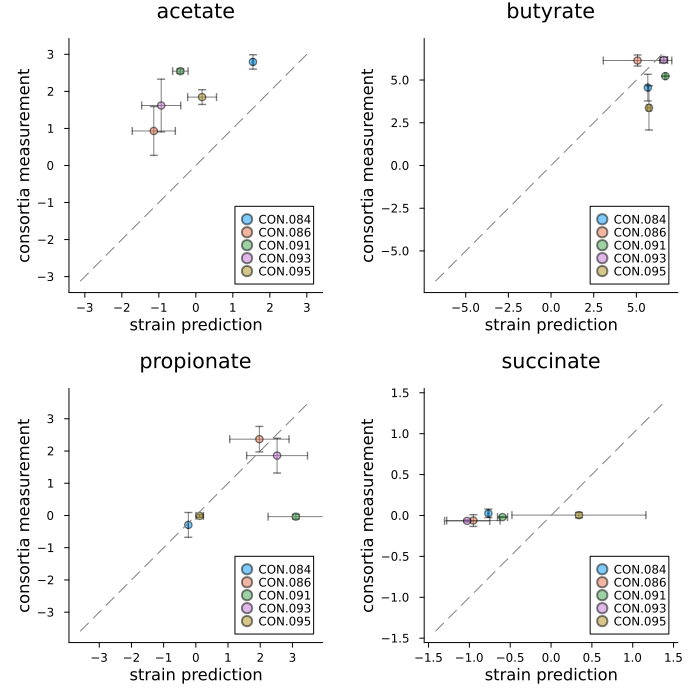

In [32]:
p1 = @df pltdf scatter(:Acetate_mean, :acetate_mean, xerror=:Acetate_std, yerror=:acetate_std, group=:con_id, alpha=.5, title="acetate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Acetate, mrgdf.acetate)), widen=1.1)
p2 = @df pltdf scatter(:Butyrate_mean, :butyrate_mean, xerror=:Butyrate_std, yerror=:butyrate_std, group=:con_id, alpha=.5, title="butyrate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Butyrate, mrgdf.butyrate)), widen=1.1)
p3 = @df pltdf scatter(:Propionate_mean, :propionate_mean, xerror=:Propionate_std, yerror=:propionate_std, group=:con_id, alpha=.5, title="propionate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Propionate, mrgdf.propionate)), widen=1.1)
p4 = @df pltdf scatter(:Succinate_mean, :succinate_mean, xerror=:Succinate_std, yerror=:succinate_std, group=:con_id, alpha=.5, title="succinate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Succinate, mrgdf.succinate)), widen=1.1)
plot(p1, p2, p3, p4, layout = grid(2,2), size=(700,700), legend=:bottomright, xlabel="strain prediction", ylabel="consortia measurement")

In [33]:
mskdf = subset(oofpreds,
    :row_id => x->x.∈Ref(existingrows),
    :metabolite_name => x->x.∈Ref(["Acetate", "Butyrate", "Propionate", "Succinate"]),
) |>
df -> unstack(df, [:row_id, :resample], :metabolite_name, :truth) |>
df -> sort(df, [:row_id, :resample])
mskdf.msk_id = bbobs_trn.ID[mskdf.row_id]
mskdf

25×7 DataFrame
 Row │ row_id  resample  Acetate     Butyrate  Propionate  Succinate  msk_id   ⋯
     │ Int64   Int64     Float64?    Float64?  Float64?    Float64?   String   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     69         1  -0.0560327   6.59818    3.54974   -0.912955  MSK.11.2 ⋯
   2 │     69         2  -0.0560327   6.59818    3.54974   -0.912955  MSK.11.2
   3 │     69         3  -0.0560327   6.59818    3.54974   -0.912955  MSK.11.2
   4 │     69         4  -0.0560327   6.59818    3.54974   -0.912955  MSK.11.2
   5 │     69         5  -0.0560327   6.59818    3.54974   -0.912955  MSK.11.2 ⋯
   6 │    112         1  -0.488015    6.05481    0.438637   0.59776   MSK.16.2
   7 │    112         2  -0.488015    6.05481    0.438637   0.59776   MSK.16.2
   8 │    112         3  -0.488015    6.05481    0.438637   0.59776   MSK.16.2
  ⋮  │   ⋮        ⋮          ⋮          ⋮          ⋮           ⋮          ⋮    ⋱
  19 │    140         4   2.99394     6.51655    0.407504   0.153073  DFI.3.84 ⋯
  20 │    140         5   2.99394     6.51655    0.407504   0.153073  DFI.3.84
  21 │    315         1  -2.30989     6.8727     4.02543   -1.5909    MSK.14.1
  22 │    315         2  -2.30989     6.8727     4.02543   -1.5909    MSK.14.1
  23 │    315         3  -2.30989     6.8727     4.02543   -1.5909    MSK.14.1 ⋯
  24 │    315         4  -2.30989     6.8727     4.02543   -1.5909    MSK.14.1
  25 │    315         5  -2.30989     6.8727     4.02543   -1.5909    MSK.14.1
                                                    1 column and 10 rows omitted

In [34]:
basedf = select(consortiadf, [:con_id, :msk_id]) |> unique |>
    df -> filter(:msk_id => in(existing_msks), df)
mrgdf = leftjoin(basedf, unstack(fconsortiadf, :compound, :log2FC), on=:con_id, makeunique=true)
mrgdf = leftjoin(mrgdf, mskdf, on = :msk_id)

pltdf = mrgdf |>
    df -> groupby(df, :con_id) |>
    df -> combine(df, 
        [8:11..., 14:17...] .=> mean,
        [8:11..., 14:17...] .=> std,
        )

5×17 DataFrame
 Row │ con_id   butyrate_mean  acetate_mean  propionate_mean  succinate_mean   ⋯
     │ String7  Float64        Float64       Float64          Float64          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084        4.55624      2.79497        -0.29222        0.0259156    ⋯
   2 │ CON.086        6.14297      0.931719        2.36774       -0.0618057
   3 │ CON.091        5.22634      2.54555        -0.0362934     -0.0199167
   4 │ CON.093        6.17564      1.61819         1.85647       -0.0666574
   5 │ CON.095        3.37092      1.84588        -0.0118386      0.00430352   ⋯
                                                              12 columns omitted

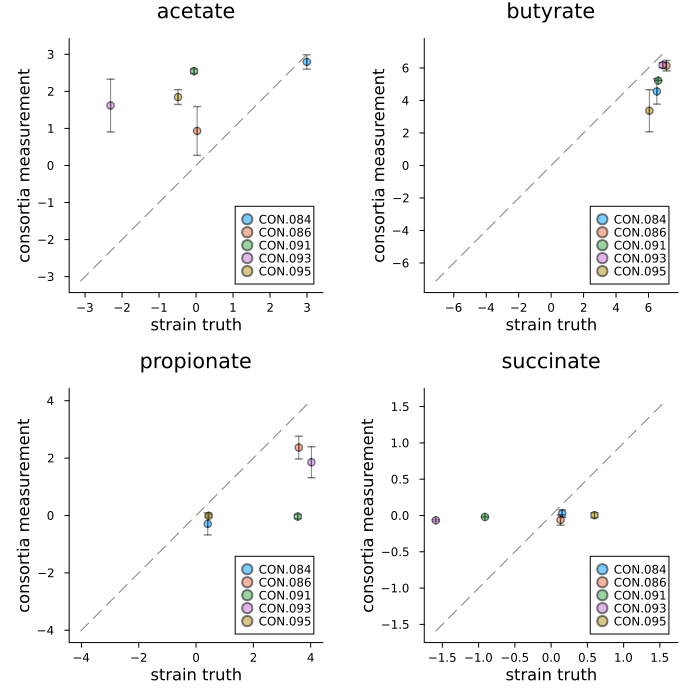

In [35]:
p1 = @df pltdf scatter(:Acetate_mean, :acetate_mean, xerror=:Acetate_std, yerror=:acetate_std, group=:con_id, alpha=.5, title="acetate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Acetate, mrgdf.acetate)), widen=1.1)
p2 = @df pltdf scatter(:Butyrate_mean, :butyrate_mean, xerror=:Butyrate_std, yerror=:butyrate_std, group=:con_id, alpha=.5, title="butyrate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Butyrate, mrgdf.butyrate)), widen=1.1)
p3 = @df pltdf scatter(:Propionate_mean, :propionate_mean, xerror=:Propionate_std, yerror=:propionate_std, group=:con_id, alpha=.5, title="propionate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Propionate, mrgdf.propionate)), widen=1.1)
p4 = @df pltdf scatter(:Succinate_mean, :succinate_mean, xerror=:Succinate_std, yerror=:succinate_std, group=:con_id, alpha=.5, title="succinate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, lims=getlims(vcat(mrgdf.Succinate, mrgdf.succinate)), widen=1.1)
plot(p1, p2, p3, p4, layout = grid(2,2), size=(700,700), legend=:bottomright, xlabel="strain truth", ylabel="consortia measurement")

In [36]:
mrgdf

70×17 DataFrame
 Row │ con_id   msk_id     con_list                      msk_id_1   input_cond ⋯
     │ String7  String15   String31?                     String15?  String?    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocheno ⋯
   2 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocholi
   3 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocheno
   4 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocholi
   5 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocheno ⋯
   6 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocholi
   7 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocheno
   8 │ CON.091  MSK.11.20  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20  taurocholi
  ⋮  │    ⋮         ⋮                   ⋮                    ⋮                 ⋱
  64 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocholi ⋯
  65 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocheno
  66 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocholi
  67 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocheno
  68 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocholi ⋯
  69 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocheno
  70 │ CON.093  MSK.14.17  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17  taurocholi
                                                  13 columns and 55 rows omitted

In [37]:
biobank.obs.species[biobank.obs.ID .== "MSK.11.20"]

1-element Vector{String}:
 "Anaerostipes hadrus"

## Out-of-bag consortia measurements

In [38]:
oofpreds = CSV.read(projectdir("_research","metabolite_SLE_Lasso_model_outofbag","oof_predictions_stacked_SPItreeLASSO_ancestralencoding_lambda=0.001.csv"), DataFrame);

In [39]:
oobpreds = CSV.read(projectdir("_research","metabolite_SLE_Lasso_model_outofbag","oob_predictions_stacked_SPItreeLASSO_ancestralencoding_lambda=0.001.csv"), DataFrame);

In [40]:
consortiadf = CSV.read(joinpath(ddir, "full_PFBBR_consortia.csv"), DataFrame)
fconsortiadf = filter(:compound => in(["butyrate", "acetate", "succinate", "propionate"]), consortiadf) |> 
    df->select(df, [:con_id, :con_list, :msk_id, :input_condition, :media, :ph_adjust, :compound, :log2FC])

192×8 DataFrame
 Row │ con_id   con_list                      msk_id     input_condition       ⋯
     │ String7  String31                      String15   String                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug. ⋯
   2 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   3 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   4 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   5 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic ⋯
   6 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   7 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   8 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
  ⋮  │    ⋮                  ⋮                    ⋮                      ⋮     ⋱
 186 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug. ⋯
 187 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 188 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 189 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 190 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic ⋯
 191 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 192 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
                                                  5 columns and 177 rows omitted

In [41]:
known_added_isolates = filter(:need_oggs => !, unique_condf).msk_id
strvar_mskids = known_added_isolates[.!isnothing.(indexin(known_added_isolates, bbobs_trn.ID))]

5-element Vector{String15}:
 "DFI.3.84"
 "DFI.4.30"
 "MSK.11.20"
 "MSK.14.17"
 "MSK.16.22"

In [42]:
merged_con_measures = fconsortiadf |> 
    df->groupby(df, [:con_id, :con_list, :msk_id, :compound]) |>
    df->combine(df, 
        :log2FC => mean,
        :log2FC => std,
    ) |>
    df->subset(df, :msk_id => x->.!(x .∈ Ref(strvar_mskids)))

48×6 DataFrame
 Row │ con_id   con_list                      msk_id     compound    log2FC_me ⋯
     │ String7  String31                      String15   String31    Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   succinate     0.12369 ⋯
   2 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   propionate    0.27834
   3 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   butyrate      5.62454
   4 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   acetate       2.3551
   5 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64   succinate     0.11272 ⋯
   6 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64   propionate    0.46772
   7 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64   butyrate      6.88241
   8 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64   acetate       3.44515
  ⋮  │    ⋮                  ⋮                    ⋮          ⋮            ⋮    ⋱
  42 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   succinate     0.16781 ⋯
  43 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   butyrate      1.46187
  44 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   acetate       2.82924
  45 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   acetate       2.5722
  46 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   succinate    -0.02602 ⋯
  47 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   propionate   -0.06276
  48 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   butyrate      0.26143
                                                   2 columns and 33 rows omitted

In [43]:
merged_con_measures_wide = leftjoin(
    unstack(merged_con_measures, 1:3, :compound, :log2FC_mean),
    unstack(merged_con_measures, 1, :compound, :log2FC_std), on=:con_id, makeunique=true)
newcolnames = ["con_id", "con_list", "msk_id", 
    "succinate_mean", "propionate_mean", "butyrate_mean", "acetate_mean", 
    "succinate_std", "propionate_std", "butyrate_std", "acetate_std"]
rename!(merged_con_measures_wide, newcolnames)

12×11 DataFrame
 Row │ con_id   con_list                      msk_id     succinate_mean  propi ⋯
     │ String7  String31                      String15   Float64?        Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78       0.123691          ⋯
   2 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64       0.112728
   3 │ CON.087  DFI.1.19,DFI.1.234,DFI.2.45   DFI.1.19      -0.0210095
   4 │ CON.088  DFI.1.234,DFI.2.45,DFI.5.28   DFI.5.28      -0.0386782       -
   5 │ CON.089  DFI.1.234,DFI.2.45,MSK.6.3    MSK.6.3        0.00460516      - ⋯
   6 │ CON.090  DFI.1.234,DFI.2.45,DFI.5.40   DFI.5.40       0.0441199       -
   7 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67   DFI.5.67       0.0531609       -
   8 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19       -1.31033
   9 │ CON.094  DFI.1.234,DFI.2.45,DFI.5.75   DFI.5.75      -1.02133           ⋯
  10 │ CON.096  DFI.1.234,DFI.2.45,MSK.17.84  MSK.17.84      0.0044376
  11 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16       0.167817        -
  12 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37      -0.0260267       -
                                                               7 columns omitted

In [44]:
congroups = split.(unique(merged_con_measures.con_list), ",")
# congroups = [[x] for x in unique(merged_con_measures_wide.msk_id)]

12-element Vector{Vector{SubString{String31}}}:
 ["DFI.1.234", "DFI.2.45", "DFI.6.78"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.64"]
 ["DFI.1.19", "DFI.1.234", "DFI.2.45"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.28"]
 ["DFI.1.234", "DFI.2.45", "MSK.6.3"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.40"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.67"]
 ["DFI.1.234", "DFI.2.45", "SL.2.19"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.75"]
 ["DFI.1.234", "DFI.2.45", "MSK.17.84"]
 ["DFI.1.234", "DFI.2.45", "DFI.5.16"]
 ["DFI.1.234", "DFI.2.45", "DFI.7.37"]

In [45]:
oobdf = subset(oobpreds,
        # :row_id => x->x.∈Ref(existingrows),
        :metabolite_name => x->x.∈Ref(["Acetate", "Butyrate", "Propionate", "Succinate"]),
    ) |>
    df -> unstack(df, [:msk_id, :fold, :resample], :metabolite_name, :preds) |>
    df -> sort(df, [:fold, :resample]);

In [46]:
conpreds_wide = map(congroups) do grp
    grpname = join(grp, ",")
    grp = filter(!in(["DFI.1.234", "DFI.2.45",]), grp)
    oobdf |> 
    df->filter(:msk_id => in(grp), df) |>
    df-> groupby(df, [:fold, :resample]) |>
    df->combine(df,
        4:7 .=> sum .=> identity
    ) |>
    df->insertcols(df, 1, :con_list=>grpname)
end |> 
    x->vcat(x...) |>
    df->groupby(df, :con_list) |>
    df->combine(df, 
        4:7 .=> mean,
        4:7 .=> std,
    )


12×9 DataFrame
 Row │ con_list                      Acetate_mean  Butyrate_mean  Propionate_m ⋯
     │ String                        Float64       Float64        Float64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.1.234,DFI.2.45,DFI.6.78       3.31756       -0.2543         -0.1924 ⋯
   2 │ DFI.1.234,DFI.2.45,DFI.5.64       2.95397       -0.216059        0.3275
   3 │ DFI.1.19,DFI.1.234,DFI.2.45      -0.576575       1.86123         0.8648
   4 │ DFI.1.234,DFI.2.45,DFI.5.28       0.50347        5.85099         0.0644
   5 │ DFI.1.234,DFI.2.45,MSK.6.3        0.483699       5.75307         0.0998 ⋯
   6 │ DFI.1.234,DFI.2.45,DFI.5.40       2.9162        -0.209081        0.6167
   7 │ DFI.1.234,DFI.2.45,DFI.5.67       2.95397       -0.203766        0.6274
   8 │ DFI.1.234,DFI.2.45,SL.2.19        2.95397       -0.216059        0.3275
   9 │ DFI.1.234,DFI.2.45,DFI.5.75       2.95397       -0.203766        0.6274 ⋯
  10 │ DFI.1.234,DFI.2.45,MSK.17.84      0.558285       5.75074         0.0993
  11 │ DFI.1.234,DFI.2.45,DFI.5.16       2.95397       -0.216059        0.3275
  12 │ DFI.1.234,DFI.2.45,DFI.7.37       0.48975        5.75307         0.0998
                                                               6 columns omitted

In [47]:
pltdf = leftjoin(merged_con_measures_wide, conpreds_wide, on=:con_list)

12×19 DataFrame
 Row │ con_id   con_list                      msk_id     succinate_mean  propi ⋯
     │ String7  String31                      String15   Float64?        Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78       0.123691          ⋯
   2 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64       0.112728
   3 │ CON.087  DFI.1.19,DFI.1.234,DFI.2.45   DFI.1.19      -0.0210095
   4 │ CON.088  DFI.1.234,DFI.2.45,DFI.5.28   DFI.5.28      -0.0386782       -
   5 │ CON.089  DFI.1.234,DFI.2.45,MSK.6.3    MSK.6.3        0.00460516      - ⋯
   6 │ CON.090  DFI.1.234,DFI.2.45,DFI.5.40   DFI.5.40       0.0441199       -
   7 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67   DFI.5.67       0.0531609       -
   8 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19       -1.31033
   9 │ CON.094  DFI.1.234,DFI.2.45,DFI.5.75   DFI.5.75      -1.02133           ⋯
  10 │ CON.096  DFI.1.234,DFI.2.45,MSK.17.84  MSK.17.84      0.0044376
  11 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16       0.167817        -
  12 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37      -0.0260267       -
                                                              15 columns omitted

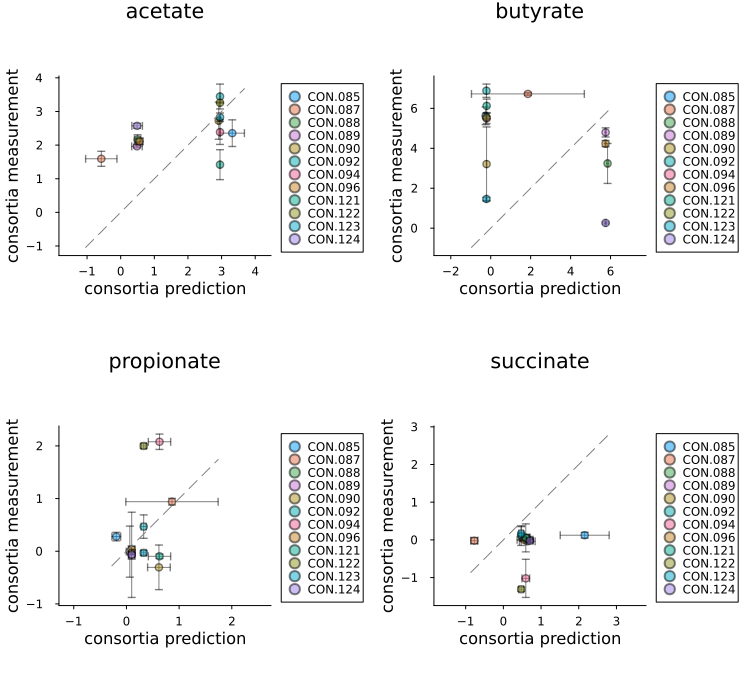

In [48]:
p1 = @df pltdf scatter(:Acetate_mean, :acetate_mean, xerror=:Acetate_std, yerror=:acetate_std, group=:con_id, alpha=.5, title="acetate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, widen=1.1)
p2 = @df pltdf scatter(:Butyrate_mean, :butyrate_mean, xerror=:Butyrate_std, yerror=:butyrate_std, group=:con_id, alpha=.5, title="butyrate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, widen=1.1)
p3 = @df pltdf scatter(:Propionate_mean, :propionate_mean, xerror=:Propionate_std, yerror=:propionate_std, group=:con_id, alpha=.5, title="propionate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, widen=1.1)
p4 = @df pltdf scatter(:Succinate_mean, :succinate_mean, xerror=:Succinate_std, yerror=:succinate_std, group=:con_id, alpha=.5, title="succinate", ratio=1)
plot!(identity, c=:grey, linestyle=:dash, widen=1.1)
plot(p1, p2, p3, p4, layout = grid(2,2), size=(750,700), ratio=1, legend=:outerright, xlabel="consortia prediction", ylabel="consortia measurement")

In [49]:
x = rand(10)

10-element Vector{Float64}:
 0.7728071645935527
 0.5309654528863391
 0.6362648448935582
 0.49496780170074706
 0.010993169511743561
 0.5388730508736074
 0.9250215235429327
 0.6476521352087588
 0.45314832701856544
 0.8254515101939833

In [50]:
std(x) ≈ std([x;x])

false

In [51]:
std([x;x])

0.24607641176854547

In [52]:
std(x)

0.25281947975106356

In [53]:
unique(condf.name)

15-element Vector{String}:
 "[Clostridium] scindens"
 "Bifidobacterium longum"
 "Coprococcus comes"
 "Anaerobutyricum soehngenii"
 "Anaerostipes hadrus"
 "Anaerostipes caccae"
 "[Eubacterium] rectale"
 "Roseburia faecis"
 "Faecalibacterium prausnitzii"
 "[Clostridium] symbiosum"
 "nothing"
 "Roseburia intestinalis"
 "[Clostridium] innocuum"
 "Flavonifractor plautii"
 "Coprococcus eutactus"

## Add Both in-dist and out-of-dist predictions to same plot

In [3]:
unique_condf = CSV.read(joinpath(ddir, "needisolate_oggs.csv"), DataFrame);

In [4]:
consortiadf = CSV.read(joinpath(ddir, "full_PFBBR_consortia.csv"), DataFrame)
fconsortiadf = filter(:compound => in(["butyrate", "acetate", "succinate", "propionate"]), consortiadf) |> 
    df->select(df, [:con_id, :con_list, :msk_id, :input_condition, :media, :ph_adjust, :compound, :log2FC])

192×8 DataFrame
 Row │ con_id   con_list                      msk_id     input_condition       ⋯
     │ String7  String31                      String15   String                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug. ⋯
   2 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   3 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   4 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   5 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic ⋯
   6 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   7 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
   8 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
  ⋮  │    ⋮                  ⋮                    ⋮                      ⋮     ⋱
 186 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug. ⋯
 187 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 188 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
 189 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 190 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic ⋯
 191 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
 192 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
                                                  5 columns and 177 rows omitted

In [5]:
biobank = readh5mu(datadir("exp_pro", "BB669", "BB669.h5mu"))

┌ Warning: Cannot join columns with the same name because var_names are intersecting.
└ @ Muon /Users/bend/.julia/packages/Muon/eLqpV/src/mudata.jl:351


MuData object 669 ✕ 21485
└ metabolites_foldchange
  AnnData object 669 ✕ 50
└ metabolites_millimolar
  AnnData object 669 ✕ 10
└ UPorder_oggs
  AnnData object 669 ✕ 10177
└ oggs
  AnnData object 669 ✕ 11248

In [6]:
specieslabels = [
    "Bacteroides uniformis",
    "Phocaeicola vulgatus",
    "Bacteroides thetaiotaomicron",
    "[Ruminococcus] gnavus",
    "Bifidobacterium breve",
    "[Eubacterium] rectale",
    "Dorea formicigenerans",
    "Coprococcus comes",
    "Blautia luti & Blautia wexlerae",
    "Anaerostipes hadrus",
]
shapes = permutedims([:circle, :rect, :star5, :diamond, :hexagon, :ltriangle, :pentagon, :utriangle, :dtriangle, :rtriangle, :star4])
speciescolors = wload(datadir("exp_pro", "BB669", "subsettreecolors.jld2"))["colors"]
# speciescolors_ordered = permutedims(speciescolors[replace(indexin(sort(unique(biobank.obs.species)), specieslabels), nothing=>9)])

In [7]:
keptspecies = string.(keys(sort(filter(x-> last(x) > 19, countmap(biobank.obs.species)), byvalue=true, rev=true)))
filter!(!=("unclassified"), keptspecies)
full_train_mask = in.(biobank.obs.species, Ref(keptspecies));
full_test_mask = .!(full_train_mask);
bbobs_trn = biobank.obs[full_train_mask, :];

In [8]:
oofpreds = CSV.read(projectdir("_research","metabolite_SLE_Lasso_model_outofbag","oof_predictions_stacked_SPItreeLASSO_ancestralencoding_lambda=0.001.csv"), DataFrame);

In [9]:
oobpreds = CSV.read(projectdir("_research","metabolite_SLE_Lasso_model_outofbag","oob_predictions_stacked_SPItreeLASSO_ancestralencoding_lambda=0.001.csv"), DataFrame);

In [10]:
added_isolate_mskids = String.(unique(fconsortiadf.msk_id))

17-element Vector{String}:
 "DFI.3.84"
 "DFI.6.78"
 "DFI.4.30"
 "DFI.5.64"
 "DFI.1.19"
 "DFI.5.28"
 "MSK.6.3"
 "DFI.5.40"
 "DFI.5.67"
 "MSK.11.20"
 "SL.2.19"
 "MSK.14.17"
 "DFI.5.75"
 "MSK.16.22"
 "MSK.17.84"
 "DFI.5.16"
 "DFI.7.37"

In [11]:
oof_wide = subset(oofpreds,
        # :msk_id => x->.∈(x, Ref(added_isolate_mskids)),
        :msk_id => ByRow(∈(added_isolate_mskids)),
        :metabolite_name => ByRow(∈(["Acetate", "Butyrate", "Propionate", "Succinate"])),
    ) |>
df -> sort(df, [:msk_id, :metabolite_name]) |>
df -> unstack(df, [:msk_id, :resample], :metabolite_name, :preds) |>
df -> groupby(df, [:msk_id]) |>
df -> combine(df, 
    3:6 .=> mean,
    3:6 .=> std,
)

5×9 DataFrame
 Row │ msk_id     Acetate_mean  Butyrate_mean  Propionate_mean  Succinate_mean ⋯
     │ String15   Float64       Float64        Float64          Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.3.84       1.54362         5.67077        -0.233056       -0.767597 ⋯
   2 │ DFI.4.30      -1.13629         5.06859         1.97317        -0.951255
   3 │ MSK.11.20     -0.419323        6.70012         3.10775        -0.594025
   4 │ MSK.14.17     -0.936271        6.601           2.52386        -1.02732
   5 │ MSK.16.22      0.16895         5.73695         0.119979        0.340988 ⋯
                                                               4 columns omitted

In [12]:
unique_condf.species_in_strvar .= sum(unique_condf.name .== permutedims(unique(bbobs_trn.species)), dims=2);
unique_condf.genus_in_strvar .= sum(first.(split.(unique_condf.name, " ")) .== permutedims(first.(split.(unique(bbobs_trn.species), " "))), dims=2);
unique_condf;

In [13]:
unique_condf

19×6 DataFrame
 Row │ msk_id     name                          seq_id            need_oggs  s ⋯
     │ String15   String31                      String31          Bool       I ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.1.234  [Clostridium] scindens        211117-DFI.1.234       true    ⋯
   2 │ DFI.2.45   Bifidobacterium longum        210702-DFI.2.45        true
   3 │ DFI.3.84   Coprococcus comes             210702-DFI.3.84       false
   4 │ DFI.6.78   Anaerobutyricum soehngenii    211108-DFI.6.78        true
   5 │ DFI.4.30   Anaerostipes hadrus           210702-DFI.4.30       false    ⋯
   6 │ DFI.1.19   Anaerostipes caccae           210509-DFI.1.19       false
   7 │ DFI.5.28   [Eubacterium] rectale         210928-DFI.5.28        true
   8 │ MSK.6.3    Roseburia faecis              TM222                 false
  ⋮  │     ⋮                   ⋮                       ⋮              ⋮        ⋱
  13 │ DFI.5.75   nothing                       nothing                true    ⋯
  14 │ MSK.16.22  [Eubacterium] rectale         MSK16_22              false
  15 │ MSK.17.84  Roseburia intestinalis        MSK17_84              false
  16 │ DFI.5.67   [Clostridium] innocuum        210702-DFI.5.67        true
  17 │ SL.2.19    Flavonifractor plautii        220104-SL.2.19         true    ⋯
  18 │ DFI.5.16   Coprococcus eutactus          210702-DFI.5.16        true
  19 │ DFI.7.37   nothing                       nothing                true
                                                    2 columns and 4 rows omitted

In [14]:
oob_wide = subset(oobpreds,
        # :msk_id => x->.∈(x, Ref(added_isolate_mskids)),
        :msk_id => ByRow(∈(added_isolate_mskids)),
        :metabolite_name => ByRow(∈(["Acetate", "Butyrate", "Propionate", "Succinate"])),
    ) |>
df -> sort(df, [:msk_id, :metabolite_name, :fold, :resample]) |>
df -> unstack(df, [:msk_id, :resample], :metabolite_name, :preds, combine=first) |>
df -> groupby(df, [:msk_id]) |>
df -> combine(df, 
    3:6 .=> mean,
    3:6 .=> std,
)

12×9 DataFrame
 Row │ msk_id     Acetate_mean  Butyrate_mean  Propionate_mean  Succinate_mean ⋯
     │ String15   Float64       Float64        Float64          Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.1.19      -0.34663        2.77478         1.22566         -0.715933 ⋯
   2 │ MSK.6.3        0.504984       5.73143         0.0837137        0.70721
   3 │ DFI.5.64       2.96728       -0.21137         0.315291         0.501136
   4 │ MSK.17.84      0.543132       5.73143         0.0815199        0.672151
   5 │ DFI.6.78       3.4311        -0.259368       -0.198647         2.36344  ⋯
   6 │ DFI.5.28       0.483262       5.83235         0.0296897        0.735292
   7 │ DFI.5.40       2.91898       -0.205279        0.774899         0.642797
   8 │ DFI.5.75       2.96728       -0.205279        0.643372         0.609662
   9 │ DFI.5.67       2.96728       -0.205279        0.643372         0.609662 ⋯
  10 │ SL.2.19        2.96728       -0.21137         0.315291         0.501136
  11 │ DFI.5.16       2.96728       -0.21137         0.315291         0.501136
  12 │ DFI.7.37       0.529184       5.73143         0.0837137        0.70721
                                                               4 columns omitted

In [15]:
addedisolate_preds = vcat(oof_wide, oob_wide)

17×9 DataFrame
 Row │ msk_id     Acetate_mean  Butyrate_mean  Propionate_mean  Succinate_mean ⋯
     │ String15   Float64       Float64        Float64          Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.3.84       1.54362        5.67077        -0.233056        -0.767597 ⋯
   2 │ DFI.4.30      -1.13629        5.06859         1.97317         -0.951255
   3 │ MSK.11.20     -0.419323       6.70012         3.10775         -0.594025
   4 │ MSK.14.17     -0.936271       6.601           2.52386         -1.02732
   5 │ MSK.16.22      0.16895        5.73695         0.119979         0.340988 ⋯
   6 │ DFI.1.19      -0.34663        2.77478         1.22566         -0.715933
   7 │ MSK.6.3        0.504984       5.73143         0.0837137        0.70721
   8 │ DFI.5.64       2.96728       -0.21137         0.315291         0.501136
  ⋮  │     ⋮           ⋮              ⋮               ⋮               ⋮        ⋱
  11 │ DFI.5.28       0.483262       5.83235         0.0296897        0.735292 ⋯
  12 │ DFI.5.40       2.91898       -0.205279        0.774899         0.642797
  13 │ DFI.5.75       2.96728       -0.205279        0.643372         0.609662
  14 │ DFI.5.67       2.96728       -0.205279        0.643372         0.609662
  15 │ SL.2.19        2.96728       -0.21137         0.315291         0.501136 ⋯
  16 │ DFI.5.16       2.96728       -0.21137         0.315291         0.501136
  17 │ DFI.7.37       0.529184       5.73143         0.0837137        0.70721
                                                    4 columns and 2 rows omitted

In [16]:
subset(fconsortiadf, :compound=>ByRow(==("acetate"))) |>
    df->sort(df, :con_id)

48×8 DataFrame
 Row │ con_id   con_list                      msk_id     input_condition       ⋯
     │ String7  String31                      String15   String                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug. ⋯
   2 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurochenodeoxycholic
   3 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurocholic_acid__ug.
   4 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   taurochenodeoxycholic
   5 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic ⋯
   6 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurocholic_acid__ug.
   7 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurocholic_acid__ug.
   8 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   taurochenodeoxycholic
  ⋮  │    ⋮                  ⋮                    ⋮                      ⋮     ⋱
  42 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67   DFI.5.67   taurochenodeoxycholic ⋯
  43 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19    taurocholic_acid__ug.
  44 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19    taurochenodeoxycholic
  45 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   taurocholic_acid__ug.
  46 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   taurochenodeoxycholic ⋯
  47 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurocholic_acid__ug.
  48 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   taurochenodeoxycholic
                                                   5 columns and 33 rows omitted

In [17]:
merged_con_measures = fconsortiadf |> 
    df->groupby(df, [:con_id, :con_list, :msk_id, :compound]) |>
    df->combine(df, 
        :log2FC => mean,
        :log2FC => std,
    ) #|>
    # df->subset(df, :msk_id => x->.!(x .∈ Ref(strvar_mskids)))
merged_con_measures_wide = leftjoin(
    unstack(merged_con_measures, 1:3, :compound, :log2FC_mean),
    unstack(merged_con_measures, 1, :compound, :log2FC_std), on=:con_id, makeunique=true)
newcolnames = [
    :acetate => :acetate_mean,
    :butyrate => :butyrate_mean,
    :propionate => :propionate_mean,
    :succinate => :succinate_mean,
    :acetate_1 => :acetate_std,
    :butyrate_1 => :butyrate_std,
    :propionate_1 => :propionate_std,
    :succinate_1 => :succinate_std,
]
rename!(merged_con_measures_wide, newcolnames)

17×11 DataFrame
 Row │ con_id   con_list                      msk_id     butyrate_mean  acetat ⋯
     │ String7  String31                      String15   Float64?       Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84         4.55624      2. ⋯
   2 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78         5.62454      2.
   3 │ CON.086  DFI.1.234,DFI.2.45,DFI.4.30   DFI.4.30         6.14297      0.
   4 │ CON.092  DFI.1.234,DFI.2.45,DFI.5.64   DFI.5.64         6.88241      3.
   5 │ CON.087  DFI.1.19,DFI.1.234,DFI.2.45   DFI.1.19         6.72225      1. ⋯
   6 │ CON.088  DFI.1.234,DFI.2.45,DFI.5.28   DFI.5.28         3.23979      2.
   7 │ CON.089  DFI.1.234,DFI.2.45,MSK.6.3    MSK.6.3          4.79528      1.
   8 │ CON.090  DFI.1.234,DFI.2.45,DFI.5.40   DFI.5.40         3.20835      2.
  ⋮  │    ⋮                  ⋮                    ⋮            ⋮             ⋮ ⋱
  11 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19          5.54147      3. ⋯
  12 │ CON.093  DFI.1.234,DFI.2.45,MSK.14.17  MSK.14.17        6.17564      1.
  13 │ CON.094  DFI.1.234,DFI.2.45,DFI.5.75   DFI.5.75         5.49415      2.
  14 │ CON.095  DFI.1.234,DFI.2.45,MSK.16.22  MSK.16.22        3.37092      1.
  15 │ CON.096  DFI.1.234,DFI.2.45,MSK.17.84  MSK.17.84        4.23218      2. ⋯
  16 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16         1.46187      2.
  17 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37         0.26143      2.
                                                    7 columns and 2 rows omitted

In [18]:
pltdf = leftjoin(merged_con_measures_wide, addedisolate_preds, on=:msk_id)
pltdf = leftjoin(pltdf, unique_condf, on=:msk_id)

17×24 DataFrame
 Row │ con_id   con_list                      msk_id     butyrate_mean  acetat ⋯
     │ String7  String31                      String15   Float64?       Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84         4.55624      2. ⋯
   2 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78         5.62454      2.
   3 │ CON.086  DFI.1.234,DFI.2.45,DFI.4.30   DFI.4.30         6.14297      0.
   4 │ CON.087  DFI.1.19,DFI.1.234,DFI.2.45   DFI.1.19         6.72225      1.
   5 │ CON.088  DFI.1.234,DFI.2.45,DFI.5.28   DFI.5.28         3.23979      2. ⋯
   6 │ CON.089  DFI.1.234,DFI.2.45,MSK.6.3    MSK.6.3          4.79528      1.
   7 │ CON.090  DFI.1.234,DFI.2.45,DFI.5.40   DFI.5.40         3.20835      2.
   8 │ CON.091  DFI.1.234,DFI.2.45,MSK.11.20  MSK.11.20        5.22634      2.
  ⋮  │    ⋮                  ⋮                    ⋮            ⋮             ⋮ ⋱
  11 │ CON.094  DFI.1.234,DFI.2.45,DFI.5.75   DFI.5.75         5.49415      2. ⋯
  12 │ CON.095  DFI.1.234,DFI.2.45,MSK.16.22  MSK.16.22        3.37092      1.
  13 │ CON.096  DFI.1.234,DFI.2.45,MSK.17.84  MSK.17.84        4.23218      2.
  14 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67   DFI.5.67         6.12427      1.
  15 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19          5.54147      3. ⋯
  16 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16         1.46187      2.
  17 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37         0.26143      2.
                                                   20 columns and 2 rows omitted

In [21]:
ddir

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BBConsortia"

In [22]:
CSV.write(joinpath(ddir, "merged_consortia-and-isolate_plotdata.csv"), pltdf)

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BBConsortia/merged_consortia-and-isolate_plotdata.csv"

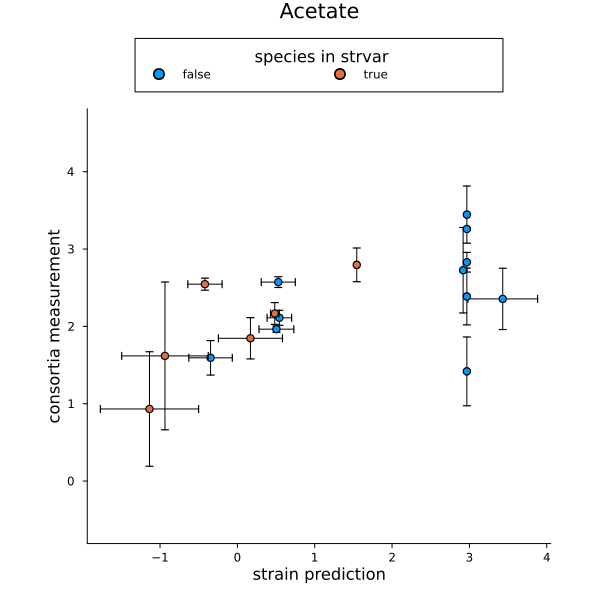

In [76]:
plot(title="Acetate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="species in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std, 
    group=:species_in_strvar .== 1, 
)

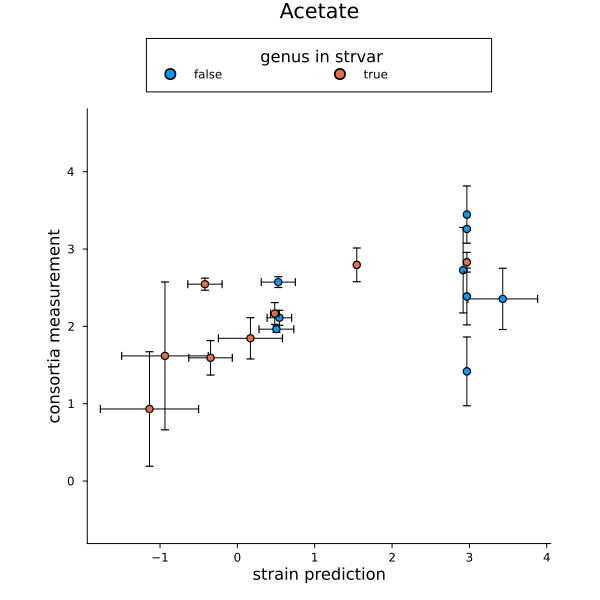

In [77]:
plot(title="Acetate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="genus in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std, 
    group=:genus_in_strvar .== 1, 
)

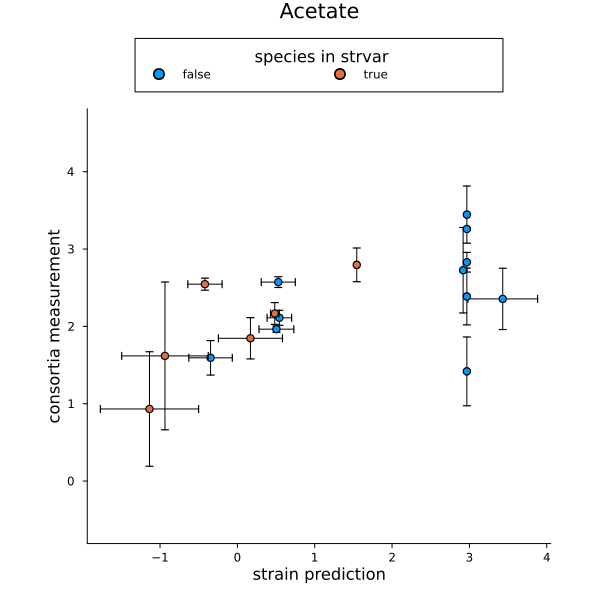

In [78]:
plot(title="Acetate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="species in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std, 
    group=:species_in_strvar .== 1, 
)

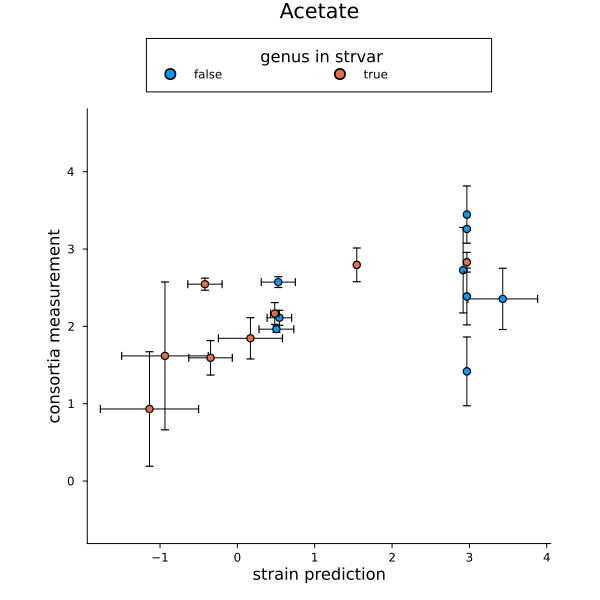

In [79]:
plot(title="Acetate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="genus in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std, 
    group=:genus_in_strvar .== 1, 
)

In [212]:
using GLM

In [213]:
model_notinstrvar = lm(@formula(acetate_mean ~ Acetate_mean), filter(:genus_in_strvar => ==(0), pltdf))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

acetate_mean ~ 1 + Acetate_mean

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   2.15992     0.450676  4.79    0.0020   1.09424    3.2256
Acetate_mean  0.141305    0.180123  0.78    0.4585  -0.284619   0.567229
────────────────────────────────────────────────────────────────────────

In [214]:
model_instrvar = lm(@formula(acetate_mean ~ Acetate_mean), filter(:genus_in_strvar => ==(1), pltdf))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

acetate_mean ~ 1 + Acetate_mean

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   1.92804     0.15653   12.32    <1e-04  1.54503     2.31105
Acetate_mean  0.387611    0.118693   3.27    0.0171  0.0971794   0.678042
─────────────────────────────────────────────────────────────────────────

In [215]:
r2(model_instrvar), r2(model_notinstrvar)

(0.6399536074233302, 0.08081290367895733)

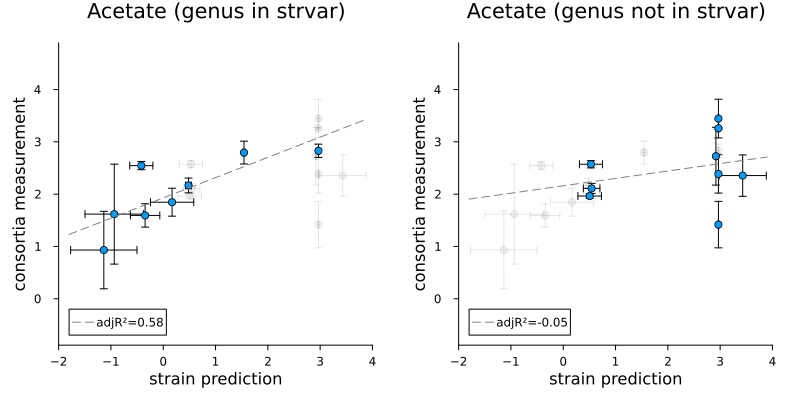

In [216]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    c=:grey, alpha=0.1
)
plot!(x->predict(model_instrvar, [(;Acetate_mean=x)])[1],-1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_instrvar), digits=2))",
)  

p2 = plot(title="Acetate (genus not in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    c=:grey, alpha=0.1
)
plot!(x->predict(model_notinstrvar, [(;Acetate_mean=x)])[1], -1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_notinstrvar), digits=2))",
)
plot(p1, p2, 
    layout=grid(1,2), 
    legend=:bottomleft, size=(800,400),
    margin=5Plots.mm,
    xlims=(-2, 4),
    link=:y
    )  

In [85]:
savefig(joinpath(pdir, "Acetate_strainvsconsortia_scatter_withshadows.pdf"))

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia/Acetate_strainvsconsortia_scatter_withshadows.pdf"

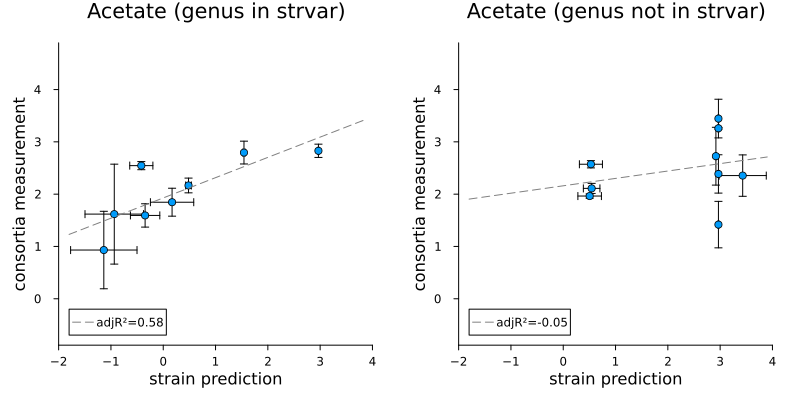

In [86]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
# @df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
plot!(x->predict(model_instrvar, [(;Acetate_mean=x)])[1],-1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_instrvar), digits=2))",
)  

p2 = plot(title="Acetate (genus not in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
# @df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
plot!(x->predict(model_notinstrvar, [(;Acetate_mean=x)])[1], -1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_notinstrvar), digits=2))",
)
plot(p1, p2, 
    layout=grid(1,2), 
    legend=:bottomleft, size=(800,400),
    margin=5Plots.mm,
    xlims=(-2, 4),
    link=:y
    )  

In [87]:
savefig(joinpath(pdir, "Acetate_strainvsconsortia_scatter_withoutshadows.pdf"))

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia/Acetate_strainvsconsortia_scatter_withoutshadows.pdf"

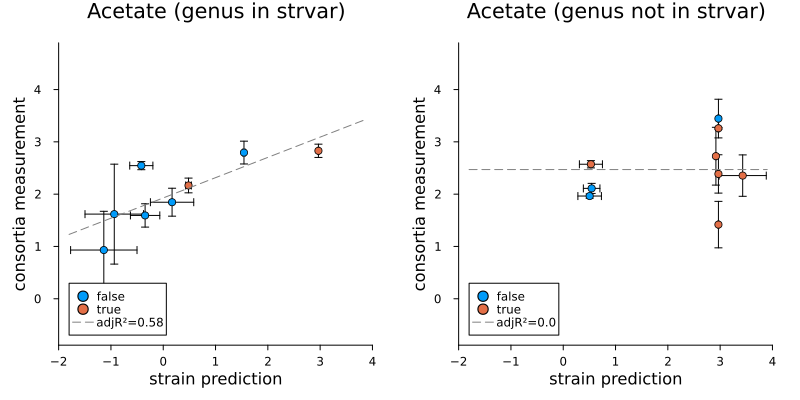

In [219]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    group=:need_oggs,
)
# @df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
plot!(x->predict(model_instrvar, [(;Acetate_mean=x)])[1],-1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_instrvar), digits=2))",
)  

p2 = plot(title="Acetate (genus not in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    group=:need_oggs,
)
# @df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
@df filter(:genus_in_strvar => ==(0), pltdf) plot!(
    x->mean(:acetate_mean), -1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=0.0",
)
plot(p1, p2, 
    layout=grid(1,2), 
    legend=:bottomleft, size=(800,400),
    margin=5Plots.mm,
    xlims=(-2, 4),
    link=:y
    )  

In [89]:
savefig(joinpath(pdir, "Acetate_strainvsconsortia_scatter_withoutshadows.pdf"))

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia/Acetate_strainvsconsortia_scatter_withoutshadows.pdf"

In [148]:
pltdf.need_oggs |> sum

8

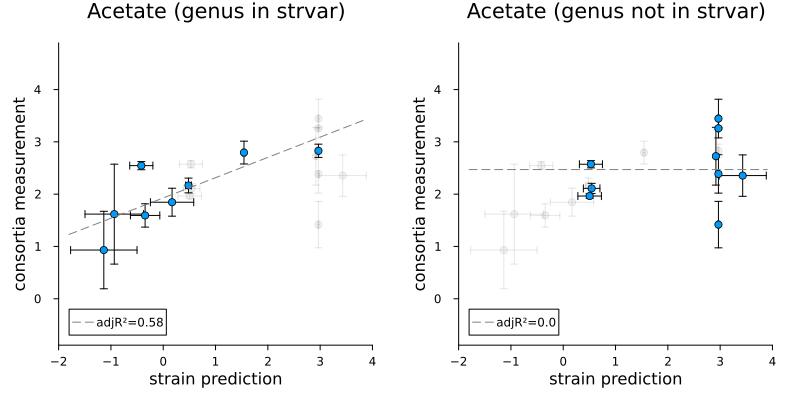

In [90]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    c=:grey, alpha=0.1
)
plot!(x->predict(model_instrvar, [(;Acetate_mean=x)])[1],-1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_instrvar), digits=2))",
)  

p2 = plot(title="Acetate (genus not in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
    c=:grey, alpha=0.1
)
@df filter(:genus_in_strvar => ==(0), pltdf) plot!(
    x->mean(:acetate_mean), -1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=0.0",
)
plot(p1, p2, 
    layout=grid(1,2), 
    legend=:bottomleft, size=(800,400),
    margin=5Plots.mm,
    xlims=(-2, 4),
    link=:y
    )  

In [91]:
savefig(joinpath(pdir, "Acetate_strainvsconsortia_scatter_withshadows.pdf"))

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia/Acetate_strainvsconsortia_scatter_withshadows.pdf"

In [521]:
pltdf |>
df -> subset(df, :genus_in_strvar => ByRow(==(1))) |>
df -> select(df, [:msk_id, :name, :genus_in_strvar, :need_oggs])

8×4 DataFrame
 Row │ msk_id     name                   genus_in_strvar  need_oggs 
     │ String15   String31?              Int64?           Bool?     
─────┼──────────────────────────────────────────────────────────────
   1 │ DFI.3.84   Coprococcus comes                    1      false
   2 │ DFI.4.30   Anaerostipes hadrus                  1      false
   3 │ DFI.1.19   Anaerostipes caccae                  1      false
   4 │ DFI.5.28   [Eubacterium] rectale                1       true
   5 │ MSK.11.20  Anaerostipes hadrus                  1      false
   6 │ MSK.14.17  Anaerostipes hadrus                  1      false
   7 │ MSK.16.22  [Eubacterium] rectale                1      false
   8 │ DFI.5.16   Coprococcus eutactus                 1       true

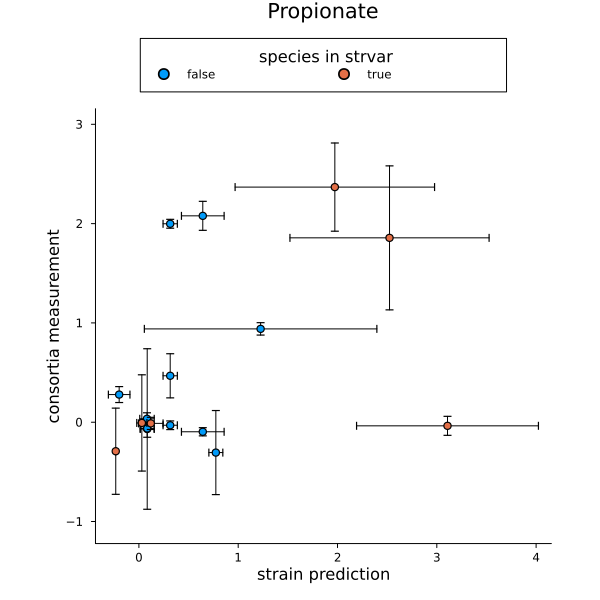

In [511]:
plot(title="Propionate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="species in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Propionate_mean, :propionate_mean, 
    xerror=:Propionate_std, yerror=:propionate_std, 
    group=:species_in_strvar .== 1, 
)

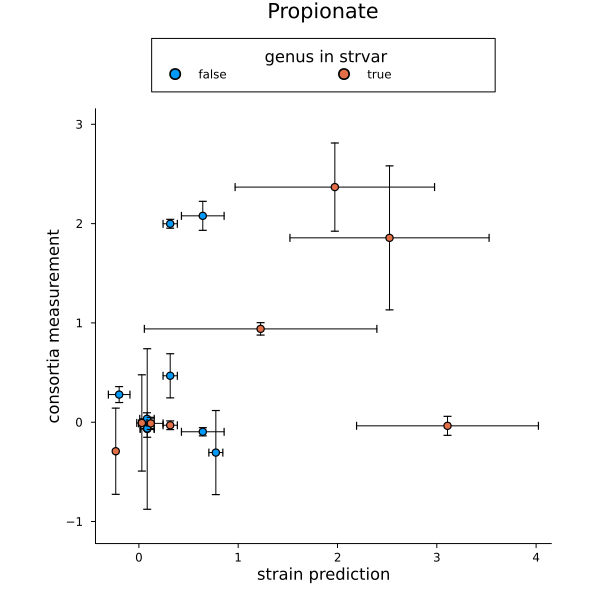

In [512]:
plot(title="Propionate", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(600,600),
    legendtitle="genus in strvar",
    legendcolumns=2,
    legend=:outertop
)
@df pltdf scatter!(:Propionate_mean, :propionate_mean, 
    xerror=:Propionate_std, yerror=:propionate_std, 
    group=:genus_in_strvar .== 1, 
)

In [516]:
oof_wide_truth = subset(oofpreds,
        # :msk_id => x->.∈(x, Ref(added_isolate_mskids)),
        :msk_id => ByRow(∈(added_isolate_mskids)),
        :metabolite_name => ByRow(∈(["Acetate", "Butyrate", "Propionate", "Succinate"])),
    ) |>
df -> sort(df, [:msk_id, :metabolite_name]) |>
df -> unstack(df, [:msk_id, :resample], :metabolite_name, :truth) |>
df -> groupby(df, [:msk_id]) |>
df -> combine(df, 
    3:6 .=> mean,
    3:6 .=> std,
)

5×9 DataFrame
 Row │ msk_id     Acetate_mean  Butyrate_mean  Propionate_mean  Succinate_mean ⋯
     │ String15   Float64       Float64        Float64          Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.3.84      2.99394          6.51655         0.407504        0.153073 ⋯
   2 │ DFI.4.30      0.0298967        7.10884         3.58584         0.13039
   3 │ MSK.11.20    -0.0560327        6.59818         3.54974        -0.912955
   4 │ MSK.14.17    -2.30989          6.8727          4.02543        -1.5909
   5 │ MSK.16.22    -0.488015         6.05481         0.438637        0.59776  ⋯
                                                               4 columns omitted

In [517]:
oob_wide_truth = subset(oobpreds,
        # :msk_id => x->.∈(x, Ref(added_isolate_mskids)),
        :msk_id => ByRow(∈(added_isolate_mskids)),
        :metabolite_name => ByRow(∈(["Acetate", "Butyrate", "Propionate", "Succinate"])),
    ) |>
df -> sort(df, [:msk_id, :metabolite_name, :fold, :resample]) |>
df -> unstack(df, [:msk_id, :resample], :metabolite_name, :truth, combine=first) |>
df -> groupby(df, [:msk_id]) |>
df -> combine(df, 
    3:6 .=> mean,
    3:6 .=> std,
)

ArgumentError: ArgumentError: column name :truth not found in the data frame

In [ ]:
addedisolate_preds = vcat(oof_wide, oob_wide)

17×9 DataFrame
 Row │ msk_id     Acetate_mean  Butyrate_mean  Propionate_mean  Succinate_mean ⋯
     │ String15   Float64       Float64        Float64          Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DFI.3.84       1.54362        5.67077        -0.233056        -0.767597 ⋯
   2 │ DFI.4.30      -1.13629        5.06859         1.97317         -0.951255
   3 │ MSK.11.20     -0.419323       6.70012         3.10775         -0.594025
   4 │ MSK.14.17     -0.936271       6.601           2.52386         -1.02732
   5 │ MSK.16.22      0.16895        5.73695         0.119979         0.340988 ⋯
   6 │ DFI.1.19      -0.34663        2.77478         1.22566         -0.715933
   7 │ MSK.6.3        0.504984       5.73143         0.0837137        0.70721
   8 │ DFI.5.64       2.96728       -0.21137         0.315291         0.501136
  ⋮  │     ⋮           ⋮              ⋮               ⋮               ⋮        ⋱
  11 │ DFI.5.28       0.483262       5.83235         0.0296897        0.735292 ⋯
  12 │ DFI.5.40       2.91898       -0.205279        0.774899         0.642797
  13 │ DFI.5.75       2.96728       -0.205279        0.643372         0.609662
  14 │ DFI.5.67       2.96728       -0.205279        0.643372         0.609662
  15 │ SL.2.19        2.96728       -0.21137         0.315291         0.501136 ⋯
  16 │ DFI.5.16       2.96728       -0.21137         0.315291         0.501136
  17 │ DFI.7.37       0.529184       5.73143         0.0837137        0.70721
                                                    4 columns and 2 rows omitted

In [130]:
suppdir = projectdir("_research", "supplement_tables") |> mkpath

"/Users/bend/projects/Doran_etal_2022/_research/supplement_tables"

In [133]:
CSBoggs = DataFrame(biobank["oggs"].X[:,:], biobank["oggs"].var_names.vals)
insertcols!(CSBoggs, 1, :msk_id => biobank["oggs"].obs_names.vals)

CSBoggs_UP = DataFrame(biobank["UPorder_oggs"].X[:,:], biobank["UPorder_oggs"].var_names.vals)
insertcols!(CSBoggs_UP, 1, :msk_id => biobank["UPorder_oggs"].obs_names.vals)

UPV = DataFrame(biobank["UPorder_oggs"].varm["UP_RSVs"][:, :], ["PC_" * string(i) for i in 1:7047])
insertcols!(UPV, 1, :ogg_id=>biobank["UPorder_oggs"].var_names.vals)

using LinearAlgebra
P = biobank["UPorder_oggs"].obsm["inferredLSVs"][:,:] * diagm(biobank["UPorder_oggs"].uns["UP_SVs"][:])
CSB_PCs = DataFrame(P, ["PC_" * string(i) for i in 1:7047])
insertcols!(CSB_PCs, 1, :msk_id => biobank["UPorder_oggs"].obs_names.vals)

inferredtree = DataFrame(:tree => biobank["UPorder_oggs"].uns["inferrednewicktree_nj"]);

In [144]:
XLSX.writetable(joinpath(suppdir, "Table_S3.xlsx"),
    "A_CSB_ogg_counts" => CSBoggs,
    "A_CSB_ogg_counts_inUniProtOrder" => CSBoggs_UP,
    # "B_UniProt_rotation_matrix" => UPV,
    "B_CSB_projected_on_UniProt_PCs" => CSB_PCs,
    "C_NJ_tree_of_CSB_strains" => inferredtree,
    overwrite=true,
)

In [145]:
CSV.write(joinpath(suppdir, "B_UniProt_rotation_matrix.tsv"), UPV; delim="\t")

"/Users/bend/projects/Doran_etal_2022/_research/supplement_tables/B_UniProt_rotation_matrix.tsv"

In [137]:
@doc XLSX.writetable

```
writetable(filename, table; [overwrite], [sheetname])
```

Write Tables.jl `table` to the specified filename.

```
writetable(filename::AbstractString, tables::Vector{Pair{String, T}}; overwrite::Bool=false)
writetable(filename::AbstractString, tables::Pair{String, Any}...; overwrite::Bool=false)
```

```
writetable(filename, data, columnnames; [overwrite], [sheetname])
```

  * `data` is a vector of columns.
  * `columnames` is a vector of column labels.
  * `overwrite` is a `Bool` to control if `filename` should be overwritten if already exists.
  * `sheetname` is the name for the worksheet.

# Example

```julia
import XLSX
columns = [ [1, 2, 3, 4], ["Hey", "You", "Out", "There"], [10.2, 20.3, 30.4, 40.5] ]
colnames = [ "integers", "strings", "floats" ]
XLSX.writetable("table.xlsx", columns, colnames)
```

See also: [`XLSX.writetable!`](@ref).

```
writetable(filename::AbstractString; overwrite::Bool=false, kw...)
writetable(filename::AbstractString, tables::Vector{Tuple{String, Vector{Any}, Vector{String}}}; overwrite::Bool=false)
```

Write multiple tables.

`kw` is a variable keyword argument list. Each element should be in this format: `sheetname=( data, column_names )`, where `data` is a vector of columns and `column_names` is a vector of column labels.

Example:

```julia
julia> import DataFrames, XLSX

julia> df1 = DataFrames.DataFrame(COL1=[10,20,30], COL2=["Fist", "Sec", "Third"])

julia> df2 = DataFrames.DataFrame(AA=["aa", "bb"], AB=[10.1, 10.2])

julia> XLSX.writetable("report.xlsx", "REPORT_A" => df1, "REPORT_B" => df2)
```


## Write out con table

In [176]:
unique_condf = CSV.read(joinpath(ddir, "needisolate_oggs.csv"), DataFrame);
df = XLSX.readtable(joinpath(ddir, "consortia_metab_quant_data.xlsx"), "query_output2", infer_eltypes=true) |> 
    DataFrame;
fdf = filter(:hmmf_panels_used => x->contains(x, "PFBBr"), df);

In [178]:
unique_condf

19×4 DataFrame
 Row │ msk_id     name                          seq_id            need_oggs 
     │ String15   String31                      String31          Bool      
─────┼──────────────────────────────────────────────────────────────────────
   1 │ DFI.1.234  [Clostridium] scindens        211117-DFI.1.234       true
   2 │ DFI.2.45   Bifidobacterium longum        210702-DFI.2.45        true
   3 │ DFI.3.84   Coprococcus comes             210702-DFI.3.84       false
   4 │ DFI.6.78   Anaerobutyricum soehngenii    211108-DFI.6.78        true
   5 │ DFI.4.30   Anaerostipes hadrus           210702-DFI.4.30       false
   6 │ DFI.1.19   Anaerostipes caccae           210509-DFI.1.19       false
   7 │ DFI.5.28   [Eubacterium] rectale         210928-DFI.5.28        true
   8 │ MSK.6.3    Roseburia faecis              TM222                 false
  ⋮  │     ⋮                   ⋮                       ⋮              ⋮
  13 │ DFI.5.75   nothing                       nothing                true
  14 │ MSK.16.22  [Eubacterium] rectale         MSK16_22              false
  15 │ MSK.17.84  Roseburia intestinalis        MSK17_84              false
  16 │ DFI.5.67   [Clostridium] innocuum        210702-DFI.5.67        true
  17 │ SL.2.19    Flavonifractor plautii        220104-SL.2.19         true
  18 │ DFI.5.16   Coprococcus eutactus          210702-DFI.5.16        true
  19 │ DFI.7.37   nothing                       nothing                true
                                                              4 rows omitted

In [177]:

tstdf = fdf |> df->groupby(df, names(fdf)[1:9]) |>
    df->combine(df, :compounds_values_blanks => ByRow((
        x->columntable(JSON.parse.(x))
    )) => AsTable)  |>
    df->flatten(df, [:compound, :value, :blank]) |>
    df->rename(df, :msk_id => :con_id) |>
    df->subset(df, :compound => ByRow(==("acetate"))) |>
    df->sort(df, [:con_id, :input_condition, :ph_adjust]) |>
    df->transform(df, [:value, :blank] => ByRow((x,y)->log2(max(x, 0.005)/max(y, 0.005))) => :log2FC) |>
    df->select(df, :con_id, :media, :input_condition, :ph_adjust, :compound, :value=>:consortia_acetate_mM, :blank=>:blank_acetate_mM, :log2FC) |>
    df->leftjoin(df, )

MethodError: MethodError: no method matching leftjoin(::DataFrame)

Closest candidates are:
  leftjoin(::AbstractDataFrame, !Matched::AbstractDataFrame; on, makeunique, source, indicator, validate, renamecols, matchmissing, order)
   @ DataFrames ~/.julia/packages/DataFrames/58MUJ/src/join/composer.jl:917


In [182]:
df

1090×17 DataFrame
  Row │ con_id   experiment_id  input_condition                    hmmf_panels ⋯
      │ String7  Int64          String                             String31    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    2 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    3 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    4 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    5 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP ⋯
    6 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    7 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
    8 │ CON.084              3  taurocholic_acid__ug.ml:10         ["BileAcidP
  ⋮   │    ⋮           ⋮                        ⋮                              ⋱
 1084 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1085 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1086 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1087 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1088 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP ⋯
 1089 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
 1090 │ CON.124              4  taurochenodeoxycholic_acid__ug.m…  ["BileAcidP
                                                14 columns and 1075 rows omitted

In [193]:
df = CSV.read(joinpath(ddir, "full_PFBBR_consortia.csv"), DataFrame)
fdf = filter(:compound => in(["acetate"]), df) |> 
    df->select(df, 
        :con_id, :con_list, :msk_id,
        :name=> :added_species, 
        :media, :input_condition, :ph_adjust, :compound, 
        :value=>:strain_acetate_mM, :blank=>:blank_acetate_mM, :log2FC
    ) |>
    df->sort(df, [:con_id, :input_condition, :ph_adjust,]) #|>
    # df->CSV.write(projectdir("_research","supplement_tables","Supplementary_Table_6.csv"), df)

48×11 DataFrame
 Row │ con_id   con_list                      msk_id     added_species         ⋯
     │ String7  String31                      String15   String31              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   Coprococcus comes     ⋯
   2 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   Coprococcus comes
   3 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   Coprococcus comes
   4 │ CON.084  DFI.1.234,DFI.2.45,DFI.3.84   DFI.3.84   Coprococcus comes
   5 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   Anaerobutyricum soehn ⋯
   6 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   Anaerobutyricum soehn
   7 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   Anaerobutyricum soehn
   8 │ CON.085  DFI.1.234,DFI.2.45,DFI.6.78   DFI.6.78   Anaerobutyricum soehn
  ⋮  │    ⋮                  ⋮                    ⋮                  ⋮         ⋱
  42 │ CON.121  DFI.1.234,DFI.2.45,DFI.5.67   DFI.5.67   [Clostridium] innocuu ⋯
  43 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19    Flavonifractor plauti
  44 │ CON.122  DFI.1.234,DFI.2.45,SL.2.19    SL.2.19    Flavonifractor plauti
  45 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   Coprococcus eutactus
  46 │ CON.123  DFI.1.234,DFI.2.45,DFI.5.16   DFI.5.16   Coprococcus eutactus  ⋯
  47 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   nothing
  48 │ CON.124  DFI.1.234,DFI.2.45,DFI.7.37   DFI.7.37   nothing
                                                   8 columns and 33 rows omitted

In [195]:
fdf.added_species |> unique

13-element Vector{String31}:
 "Coprococcus comes"
 "Anaerobutyricum soehngenii"
 "Anaerostipes hadrus"
 "Anaerostipes caccae"
 "[Eubacterium] rectale"
 "Roseburia faecis"
 "Faecalibacterium prausnitzii"
 "[Clostridium] symbiosum"
 "nothing"
 "Roseburia intestinalis"
 "[Clostridium] innocuum"
 "Flavonifractor plautii"
 "Coprococcus eutactus"

In [242]:
cm = countmap(biobank.obs.species) |> collect |> x->sort(x, by=last, rev=true)
cm[1:20]

20-element Vector{Pair{String, Int64}}:
            "Phocaeicola vulgatus" => 88
           "[Ruminococcus] gnavus" => 41
    "Bacteroides thetaiotaomicron" => 35
             "Anaerostipes hadrus" => 31
           "Bacteroides uniformis" => 27
                    "unclassified" => 26
                    "Blautia luti" => 24
           "Bifidobacterium breve" => 24
               "Coprococcus comes" => 23
           "Dorea formicigenerans" => 22
                "Blautia wexlerae" => 21
           "[Eubacterium] rectale" => 20
 "Fusicatenibacter saccharivorans" => 19
      "Parabacteroides distasonis" => 19
           "Bacteroides eggerthii" => 18
                "Prevotella copri" => 14
       "Mediterraneibacter faecis" => 13
             "Anaerostipes caccae" => 12
               "Dorea longicatena" => 11
       "Bacteroides xylanisolvens" => 11

In [238]:
first(cm) |> last

22